In [1]:
#using Revise
addprocs(4)
using CMDPs
using POMDPs, POMDPToolbox, POMDPModels, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = InvertedPendulum()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b, n_iterations=5)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

(-0.025191134410591044, 0.004602774999873649)

In [4]:
hr = HistoryRecorder(; max_steps=40, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

41-element Array{Tuple{Float64,Float64},1}:
 (-0.0251911, 0.00460277) 
 (0.0146075, 0.791369)    
 (0.0539696, -0.00412599) 
 (0.0118304, -0.838658)   
 (-0.0303888, -0.00572687)
 (-0.0398368, -0.183232)  
 (-0.0203015, 0.573937)   
 (0.0305578, 0.443249)    
 (0.0828805, 0.603204)    
 (0.116629, 0.0717701)    
 (0.0936752, -0.530851)   
 (0.0455831, -0.430991)   
 (0.0540774, 0.600878)    
 ⋮                        
 (-0.325379, -0.894301)   
 (-0.402261, -0.64335)    
 (-0.458781, -0.487051)   
 (-0.506258, -0.462493)   
 (-0.55507, -0.51375)     
 (-0.617895, -0.742731)   
 (-0.699297, -0.885319)   
 (-0.804793, -1.22459)    
 (-0.951117, -1.70189)    
 (-1.18171, -2.91003)     
 (-1.54169, -4.28951)     
 (-2.04399, -5.75643)     

In [6]:
h.reward_hist

40-element Array{Float64,1}:
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  ⋮  
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
  0.1
 -1.0

In [7]:
## Study

In [8]:
study = RewardvsN(; mdp=InvertedPendulum(), n_seeds=50, n_iters=[5, 10, 20, 30, 40, 50], max_steps=50)

CMDPs.RewardvsN
  mdp: POMDPModels.InvertedPendulum
  bandits: Array{DataType}((1,))
  n_seeds: Int64 50
  n_iters: Array{Int64}((6,)) [5, 10, 20, 30, 40, 50]
  max_steps: Int64 50


In [9]:
result = run_study(study)

CMDPs.RewardvsNResult("Inverted Pendulum", 300×4 DataFrames.DataFrame
│ Row │ alg            │ seed │ n_iters │ r_total │
├─────┼────────────────┼──────┼─────────┼─────────┤
│ 1   │ MCTS.DPWBandit │ 1    │ 5       │ 0.3     │
│ 2   │ MCTS.DPWBandit │ 2    │ 5       │ 5.0     │
│ 3   │ MCTS.DPWBandit │ 3    │ 5       │ 3.7     │
│ 4   │ MCTS.DPWBandit │ 4    │ 5       │ 1.6     │
│ 5   │ MCTS.DPWBandit │ 5    │ 5       │ 5.0     │
│ 6   │ MCTS.DPWBandit │ 6    │ 5       │ 1.9     │
│ 7   │ MCTS.DPWBandit │ 7    │ 5       │ -0.2    │
│ 8   │ MCTS.DPWBandit │ 8    │ 5       │ 5.0     │
│ 9   │ MCTS.DPWBandit │ 9    │ 5       │ 5.0     │
│ 10  │ MCTS.DPWBandit │ 10   │ 5       │ 1.3     │
│ 11  │ MCTS.DPWBandit │ 11   │ 5       │ 1.7     │
⋮
│ 289 │ MCTS.DPWBandit │ 39   │ 50      │ 5.0     │
│ 290 │ MCTS.DPWBandit │ 40   │ 50      │ 5.0     │
│ 291 │ MCTS.DPWBandit │ 41   │ 50      │ 5.0     │
│ 292 │ MCTS.DPWBandit │ 42   │ 50      │ 5.0     │
│ 293 │ MCTS.DPWBandit │ 43   │ 50      │ 5.

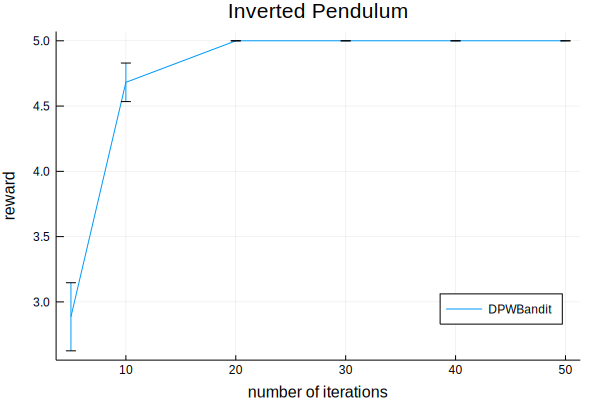

In [10]:
Plots.plot(result)